# 3. Polynomial Regression

### 공부 시간에 따른 시험 점수(우등생)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
df = pd.read_csv('PolynomialRegressionData.csv')
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

## 3-1. 단순 선형 회귀 (Simple Linear Regression)

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

### 데이터 시각화(전체)

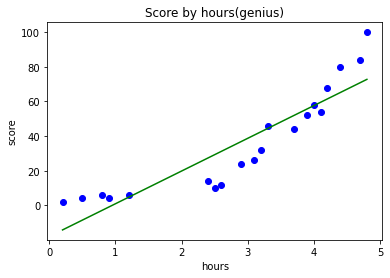

In [20]:
plt.scatter(X,y,color='blue')
plt.plot(X,reg.predict(X),color='green')
plt.title('Score by hours(genius)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [21]:
reg.score(X,y) # 전체 데이터를 통한 모델 평가

0.8169296513411765

## 3-2 다항 회귀(Polynomial Regression)

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2) # 2ck
X_poly = poly_reg.fit_transform(X)
X_poly[:5]
# X의 0제곱, 1제곱, 2제곱 -> X가 3이라면 [1,3,9]으로 변환

array([[1.  , 0.2 , 0.04],
       [1.  , 0.5 , 0.25],
       [1.  , 0.8 , 0.64],
       [1.  , 0.9 , 0.81],
       [1.  , 1.2 , 1.44]])

In [23]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [24]:
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2'], dtype=object)

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y) # 변환된 X,y 로 모델 생성

LinearRegression()

### 데이터 시각화 (변환된 X와 y)

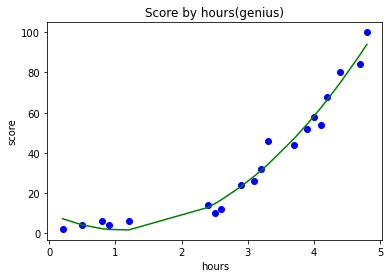

In [26]:
plt.scatter(X,y,color = 'blue')
plt.plot(X,lin_reg.predict(poly_reg.fit_transform(X)),color='green') # fit_transform을 feature를 3개로 확장
plt.title('Score by hours(genius)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [27]:
X_range=np.arange(min(X),max(X),0.1) # X의 최소값에서 최대값까지의 범위를 0.1단위로 잘라서 데이터를 생성
X_range

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [28]:
X_range.shape

(46,)

In [30]:
# Xrange와 X의 형태를 맞춰줘야함
X_range = X_range.reshape(-1,1) # row 개수는 자동으로 계산, columns 개수는 1개

In [15]:
X_range.shape

(46, 1)

In [14]:
X.shape

(20, 1)

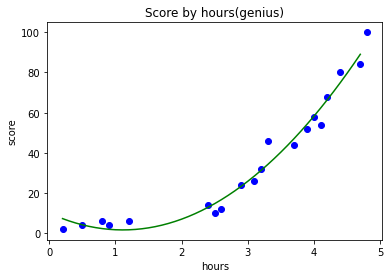

In [15]:
plt.scatter(X,y,color = 'blue')
plt.plot(X_range,lin_reg.predict(poly_reg.fit_transform(X_range)),color='green') # fit_transform을 feature를 3개로 확장
plt.title('Score by hours(genius)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 공부 시간에 따른 시험 성적 예측

In [16]:
reg.predict([[2]]) # 2시간 공부했을 때 선형회귀모형의 예측

array([19.85348988])

In [17]:
lin_reg.predict(poly_reg.fit_transform([[2]])) # 2시간을 공부했을 때 다항 회귀 모델의 예측

array([7.05092142])

In [18]:
lin_reg.score(X_poly, y)

0.9755457185555199